In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm
#%matplotlib notebook

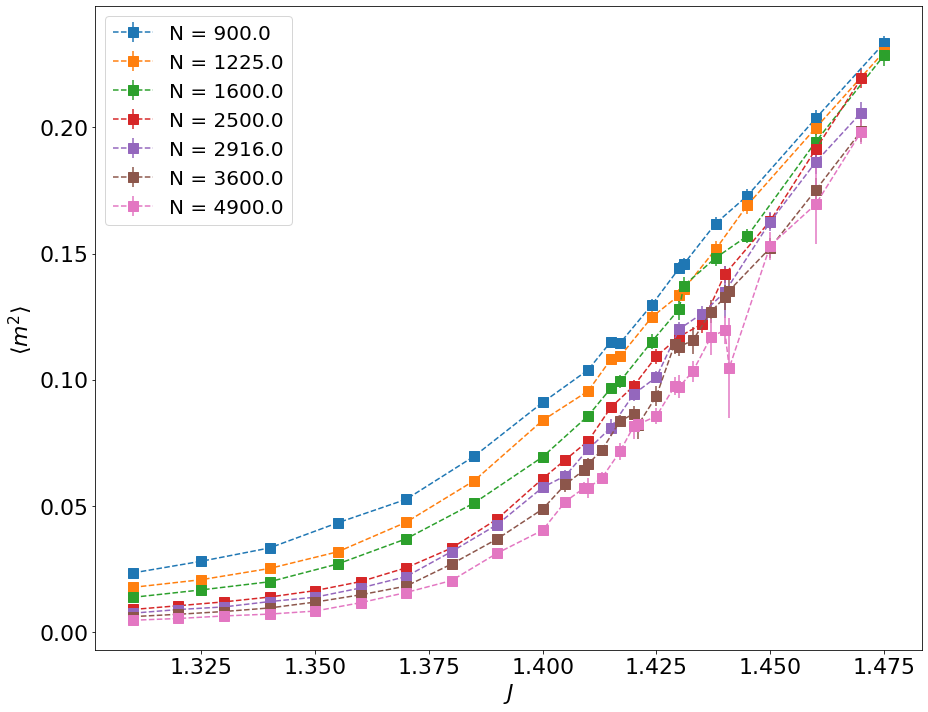

In [2]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))
  
    
data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)
#data_np1 = np.loadtxt("CPP/ClusterUpdateFix2/LongChains.txt", skiprows=0)
#data_np = np.vstack((data_np, data_np1))

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    
    if l<900: continue
   
    if l==10000: continue 
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    
    bc = data_l[:,17]
    # 
    errs = data_l[:,18]
   

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle m^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(top=0.28)
#plt.xlim(left = 1.255, right=1.355)
#plt.axes().set_xlim(right=1.325)
#plt.grid()
#ax.set_lim()
plt.legend(loc="best", fontsize=20)

plt.tight_layout()

plt.savefig("Thesis/Images/magnetization2_longchains.png", bbox_inches='tight')

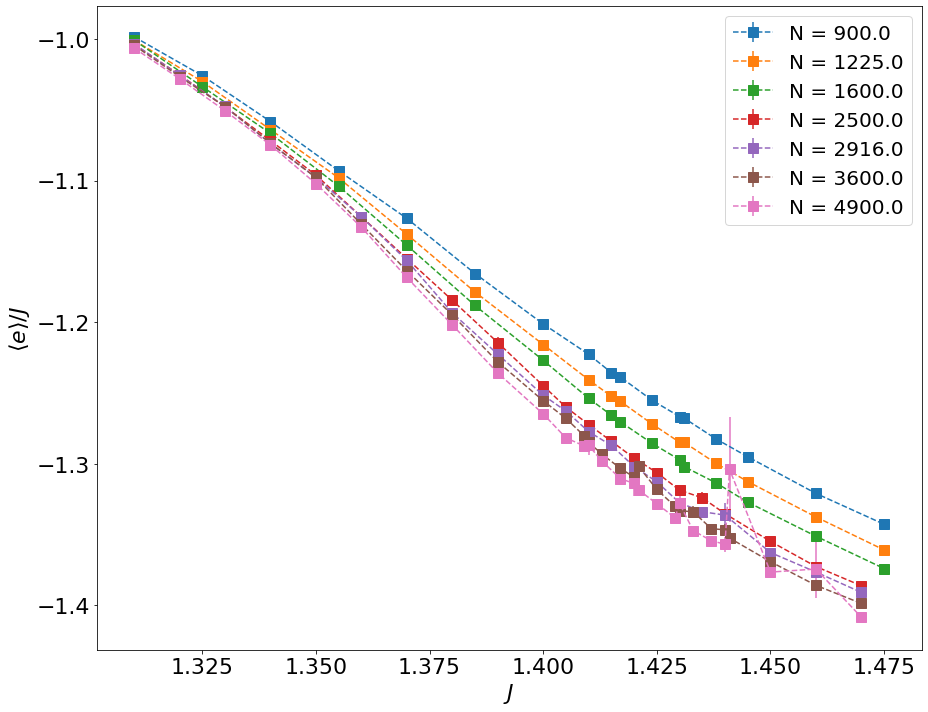

In [3]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

#data_np = np.loadtxt("CPP/ClusterUpdateFix/LongChains.txt", skiprows=0)
#data_np = np.loadtxt("CPP/RadiusPlot3/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)
#data_np1 = np.loadtxt("CPP/ClusterUpdateFix2/LongChains.txt", skiprows=0)
#data_np = np.vstack((data_np, data_np1))



y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if l<900: continue
   
    if l==10000: continue 
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    bc = data_l[:,7] 
    errs = data_l[:,8]
 

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle e \rangle / J $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)
#plt.ylim(-1.45)
#plt.xlim(left = 1.255, right=1.355)
#plt.grid()

plt.legend(loc="best", fontsize=20)

plt.tight_layout()

plt.savefig("Thesis/Images/energy_longchains.png", bbox_inches='tight')
plt.savefig("/home/kamilla/SAW_paper_KF_1/img/energy_longchains.png")

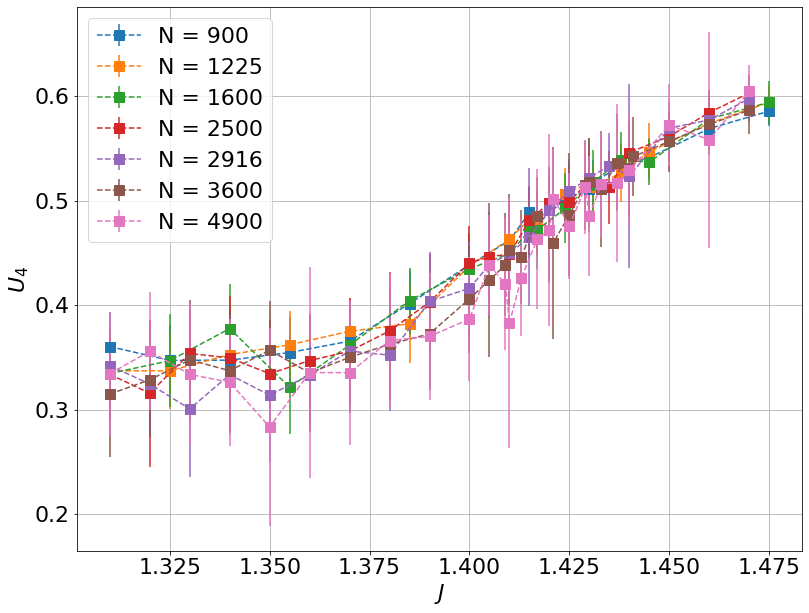

In [28]:
#data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]


lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

for l in lengths:
    #if (l>8000): continue
        #continue
        
    #if (l==6000): continue
        
        
    data_l1 = data_np[data_np[:,0]==l]
    
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 1])
    
    bc = []
    errs=[]
    J_lplot = []
    for J in J_l :
        
        data_l = data_l1[data_l1[:,1]==J]
        
        ind = np.argmin(data_l[:, 16])
        
        data_l = data_l[ind, :]        
        m2 = norm.rvs(data_l[17], data_l[18], size =  1000 )
        m4 = norm.rvs(data_l[19], data_l[20], size =  1000 )
 
        cum = 1 - m4/3/m2/m2
 
        
        mean = np.mean(cum)
        
        err=np.std(cum) 
        
        #if (err>0.06): continue
        
        bc.append(mean)
        errs.append(err)
        J_lplot.append(J)

    plt.errorbar(J_lplot, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
    
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(0.02, 0.6)
#plt.xlim(0.825, 0.844)
#plt.xlim(0.825, 0.838)
plt.grid()

plt.legend(loc="best", fontsize=22)

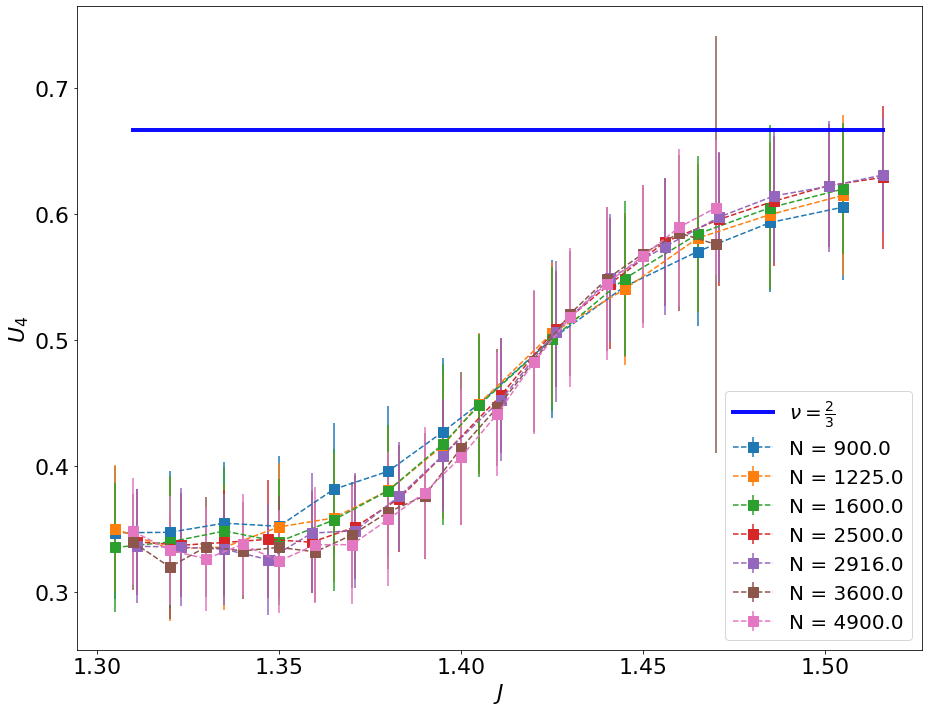

In [11]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)
#data_np1 = np.loadtxt("CPP/ClusterUpdateFix2/LongChains.txt", skiprows=0)
#data_np = np.vstack((data_np, data_np1))


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

l, b, h, w = .485, .175, .31, .402
#ax2 = fig.add_axes([l, b, w, h])
#ax2.plot([1, 4, 6, 2, 1, 5, 2], color='green', lw=3, label="inside plot")


for l in lengths:
    if l<900: continue
    #if l==5000: continue
        
    #if l==1000: continue
    
    #if (l==4900 or l==3600 or l==2916 or l==2500 or l==1600): continue
        
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]     
    J_l = data_l[:, 1]
    bc = 1 - data_l[:,19]/3/data_l[:,17]/data_l[:,17]
    errs = (2*data_l[:,18] / data_l[:,17])**2 + (data_l[:,20] /data_l[:,19])
    errs=np.sqrt(errs)*bc
    ax.errorbar(J_l, bc, yerr=0.9*errs, fmt="s--", ms = 10, label = "N = " + str(l))
    
    #data_l=data_l[ind] 
    #data_l = data_l[data_l[:,1]>1.291]
    #data_l = data_l[data_l[:,1]<1.3181]
    J_l = data_l[:, 1]
    bc = 1 - data_l[:,19]/3/data_l[:,17]/data_l[:,17]
    errs = (2*data_l[:,18] / data_l[:,17])**2 + (data_l[:,20] /data_l[:,19])
    errs=np.sqrt(errs)*bc    
    
    #ax2.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
ax.plot([J_l[0], np.max(data_np[:,1])], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
ax.set_xlabel(r'$J$', fontsize = 22)
ax.set_ylabel(r"$ U_4 $ ", fontsize=22)
ax.tick_params(axis='x', labelsize=22) 
ax.tick_params(axis='y', labelsize=22) 
#plt.ylim(1/3 -0.8, 0.7)
#plt.xlim(1.2, 1.45)
 
#plt.xlim(left = 1.255, right=1.355)

#ax.set_xlim(left = 1.28, right=1.34)
#ax2.set_xlim(1.291,1.3181)


fig.tight_layout()

ax.legend(loc="best", fontsize=20)
 
 
#ax.tight_layout()

plt.savefig("Thesis/Images/bindercumulants_longchains.png", bbox_inches='tight')
plt.savefig("/home/kamilla/SAW_paper_KF_1/img/bindercumulants_longchains.png")

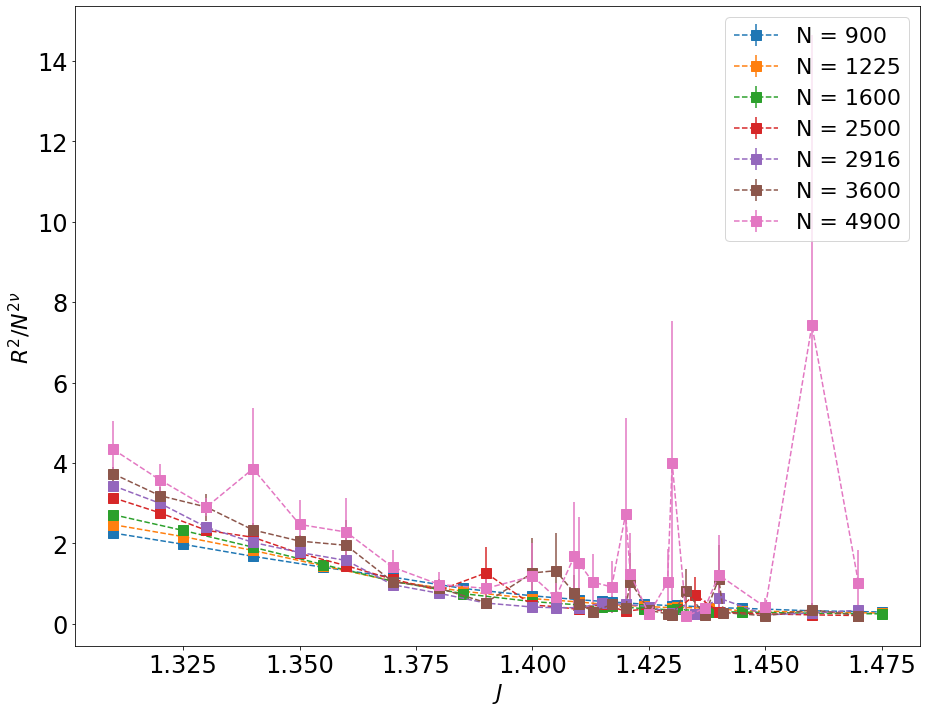

In [7]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))


J_min = 1.28
J_max = 1.34
data_np = data_np[data_np[:,1]<=J_max]
data_np = data_np[data_np[:,1]>=J_min]


#data_np = np.loadtxt("CPP/RadiusPlot/LongChains.txt", skiprows=0)

data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)
#data_np1 = np.loadtxt("CPP/ClusterUpdateFix2/LongChains.txt", skiprows=0)
#data_np = np.vstack((data_np, data_np1))

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7

for l in lengths:
    #if l!=900: continue
    #if (l==4900 or l==3600 or l==29160 or l==25000): continue
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
 
    errs = data_l[:, 4]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
 
#plt.ylim(0.05, 0.67795)
 
#plt.xlim(left = 1.28, right=1.34)
plt.legend(fontsize=22)

#plt.grid()
plt.tight_layout()
#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")
plt.savefig("Thesis/Images/rscaling_longchains.png", bbox_inches='tight')
plt.savefig("/home/kamilla/SAW_paper_KF_1/img/scaling_longchains.png")

In [8]:
J_l

array([1.31 , 1.32 , 1.33 , 1.34 , 1.35 , 1.36 , 1.37 , 1.38 , 1.39 ,
       1.4  , 1.405, 1.409, 1.41 , 1.413, 1.417, 1.42 , 1.421, 1.425,
       1.429, 1.43 , 1.433, 1.437, 1.44 , 1.45 , 1.46 , 1.47 ])

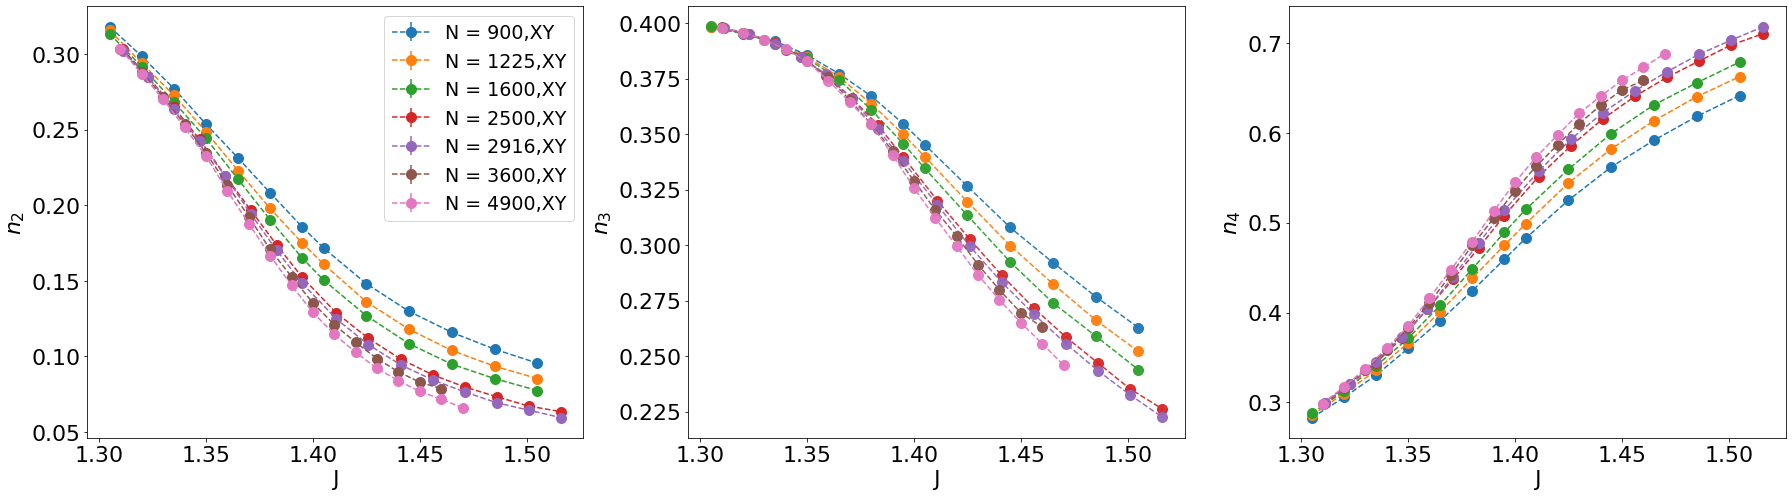

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(25,7)) #,  sharey='row')
axes = axes.reshape(-1)

data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])


for l in lengths:
    if l<900: continue
    if (l==100 or l ==400): continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]

    axes[0].errorbar(J_l, data_l[:,22], yerr=data_l[:,23], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",XY")
    axes[1].errorbar(J_l, data_l[:,24], yerr=data_l[:,25], alpha = 0.95, fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",XY")
    axes[2].errorbar(J_l, data_l[:,26], yerr=data_l[:,27], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",CY")
    
  
#axes[1].axvline(0.667, c ="k") 
#axes[0].axvline(0.667, c ="k") 
#axes[2].axvline(0.667, c ="k") 


#axes[1].axvline(0.832, c ="brown", ls = "--") 
#axes[0].axvline(0.832, c ="brown", ls = "--") 
#axes[2].axvline(0.832, c ="brown", ls = "--") 
 
    
#axes[0].set_title(r'$n_2$', fontsize=22)    
#axes[1].set_title(r'$n_3$', fontsize=22)    
#axes[2].set_title(r'$n_4$', fontsize=22)    
axes[0].set_ylabel(r'$n_2$', fontsize=22)    
axes[1].set_ylabel(r'$n_3$', fontsize=22)    
axes[2].set_ylabel(r'$n_4$', fontsize=22)  

axes[0].legend(fontsize = 19)
#axes[1].legend(fontsize = 10)
#axes[2].legend(fontsize = 11)


for i in range(3):
    axes[i].set_xlabel("J", fontsize=22)
    axes[i].tick_params(axis='x', labelsize=22) 
    axes[i].tick_params(axis='y', labelsize=22) 
 
    
    
plt.tight_layout()

plt.savefig("Thesis/Images/bulk_longchains.png", bbox_inches='tight')

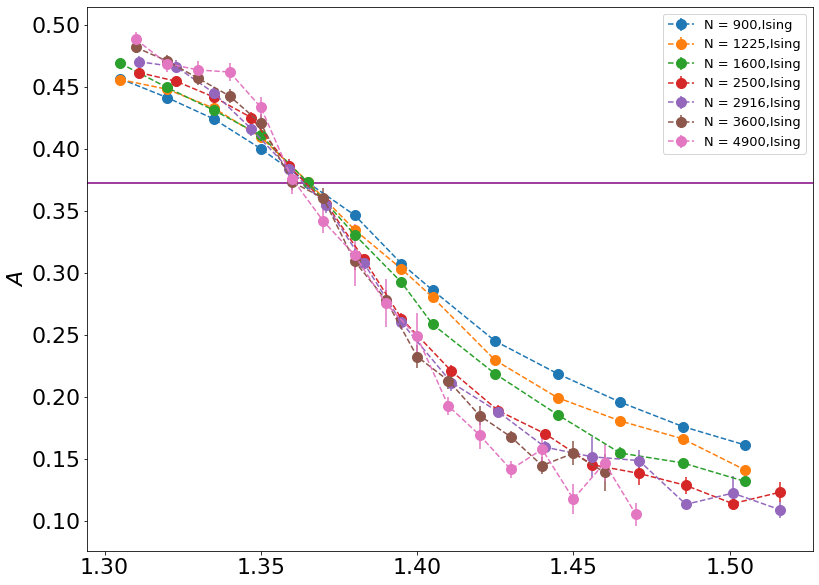

In [12]:
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

 
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))


data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]


J_min = 1.28
J_max = 1.32
#data_np = data_np[data_np[:,1]<=J_max]
#data_np = data_np[data_np[:,1]>=J_min]
 
lengths = np.unique(data_np[:, 0])


for l in lengths:
    if l<900: continue
        
    #if (l==4900 or l==3600 or l==25000): continue

    #if (l>3600): continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]

    plt.errorbar(J_l, data_l[:,32], yerr=data_l[:,33], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",Ising")
   

plt.axhline(0.3726, c ="purple") 
#plt.axvline(1.35, c ="brown", ls = "--", alpha =0.7) 
    
ax.set_ylabel(r'$A$', fontsize=22)    
#plt.xlim(left = 1.255, right=1.355)


plt.legend(fontsize = 13)

plt.tick_params(axis='y', labelsize=22) 
plt.tick_params(axis='x', labelsize=22) 
plt.savefig("Thesis/Images/aspherical_longchains.png", bbox_inches='tight')

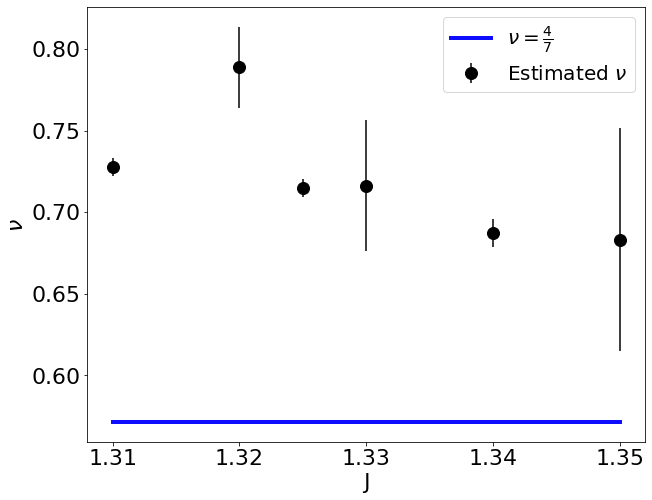

In [27]:
def r_on_n(n, nu, b):
    return 2*nu*n+b
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]>1.25] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

#data_np = np.loadtxt("CPP/ClusterUpdateFix1/LongChains.txt", skiprows=0)
#data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)

data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 1])
 

nu=4/7

 
#data_np = data_np[data_np[:,0]<3600]
#data_np = data_np[data_np[:,0]>800]



# data_np = data_np[data_np[:,1]<1.35]


J_min = 1.28
J_max = 1.35
data_np = data_np[data_np[:,1]<=J_max]
#data_np = data_np[data_np[:,1]>=J_min]


lengths = np.unique(data_np[:, 0])
J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    data_l = data_l[data_l[:,0]>99]
    data_l = data_l[data_l[:,0]>99]
    #print(data_l)
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,3]
    err_r = data_l[:,6] 
    if(len(data_l)<3): continue
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
    
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [4/7, 4/7], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18
#plt.xlim("right=")
#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)

plt.legend(loc="best", fontsize=20)
plt.savefig("Thesis/Images/nu_shortchains_1.png", bbox_inches='tight')    

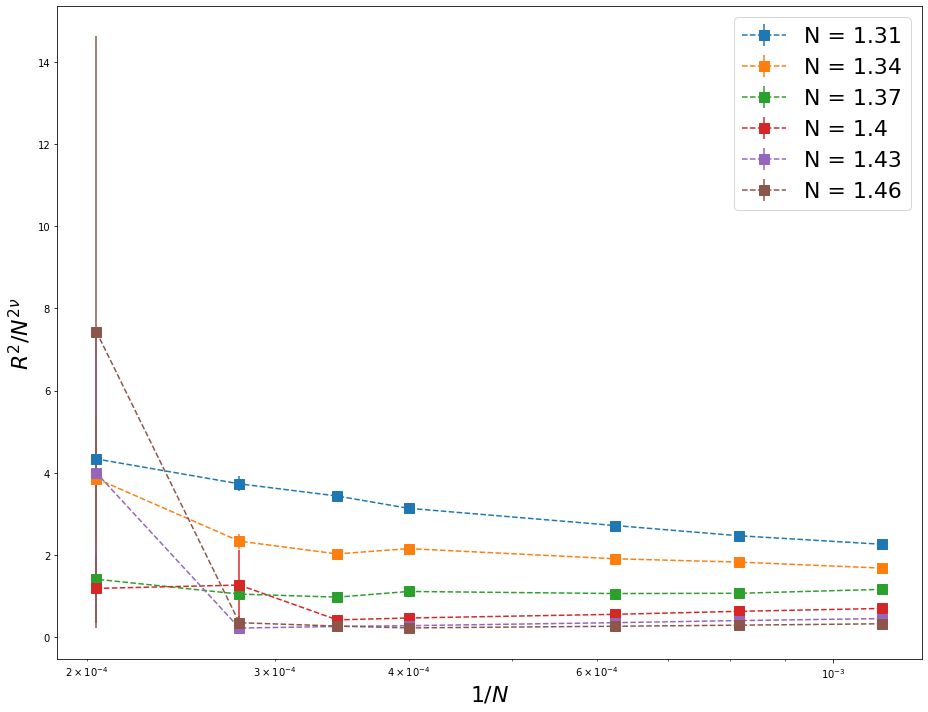

In [14]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]>1.25] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))


data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)



y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 1])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7

 
#data_np = data_np[data_np[:,0]<3600]
data_np = data_np[data_np[:,0]>800]

lengths = np.unique(data_np[:, 0])
 

data_save = []

for l in lengths:
    #if (l>9000):
    #    continue
        
    #if (l==6000): continue
        
        
    data_l1 = data_np[data_np[:,0]==l]
    
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 1])
    
    bc = []
    errs=[]
    J_lplot = []
    for J in J_l :
        
        data_l = data_l1[data_l1[:,1]==J]
        
        ind = np.argmin(data_l[:, 4])
        #print(ind, len(data_l[:, 16]))
        
        data_l = data_l[ind, :]
 
        
        data_save.append(data_l)

data_np = np.array(data_save)

 
#data_np = np.loadtxt("CPP/RadiusPlot1/LongChains.txt", skiprows=0)
#data_np = data_np[data_np[:,0]<3600]

#lengths
lengths = [1.31, 1.34 , 1.37 , 1.4, 1.43, 1.46]
#lengths = [1.26, 1.27, 1.275, 1.285, 1.295, 1.305,  1.35]
for l in lengths:
    #if l<900: continue
    #if (l==4900 or l==36000 or l==25000): continue
    data_l = data_np[data_np[:,1]==l]
    
    ind = np.argsort(data_l[:,0])
    data_l=data_l[ind]
    J_l = data_l[:, 0]
    #print(J_l)
    r_l = data_l[:, 3]
    
    bc = r_l/np.power( data_l[:, 0], 2*nu)
 
    errs = data_l[:, 4]/np.power( data_l[:, 0], 2*nu)

    plt.errorbar(1/J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str((l)))
 
 
plt.xlabel(r'$1/N $', fontsize = 22)
plt.ylabel(r"$ R ^2/N^{2 \nu} $ ", fontsize=22)
 
#plt.xlim(1.26, 1.45)
#plt.ylim(0.05, 0.60795)
 
#plt.xlim(left = 1.255, right=1.355)
plt.legend(fontsize=22)

plt.xscale("log")
#plt.grid()
plt.tight_layout()

#plt.axhline(2.351736, c= "k")

#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")
plt.savefig("Thesis/Images/rscaling_longchainscross.png", bbox_inches='tight')

In [15]:
data_np[:,1] 

array([1.31 , 1.325, 1.34 , 1.355, 1.37 , 1.385, 1.4  , 1.41 , 1.415,
       1.417, 1.424, 1.43 , 1.431, 1.438, 1.445, 1.46 , 1.475, 1.31 ,
       1.325, 1.34 , 1.355, 1.37 , 1.385, 1.4  , 1.41 , 1.415, 1.417,
       1.424, 1.43 , 1.431, 1.438, 1.445, 1.46 , 1.475, 1.31 , 1.325,
       1.34 , 1.355, 1.37 , 1.385, 1.4  , 1.41 , 1.415, 1.417, 1.424,
       1.43 , 1.431, 1.438, 1.445, 1.46 , 1.475, 1.31 , 1.32 , 1.33 ,
       1.34 , 1.35 , 1.36 , 1.37 , 1.38 , 1.39 , 1.4  , 1.405, 1.41 ,
       1.415, 1.42 , 1.425, 1.43 , 1.435, 1.44 , 1.45 , 1.46 , 1.47 ,
       1.31 , 1.32 , 1.33 , 1.34 , 1.35 , 1.36 , 1.37 , 1.38 , 1.39 ,
       1.4  , 1.405, 1.41 , 1.415, 1.42 , 1.425, 1.43 , 1.435, 1.44 ,
       1.45 , 1.46 , 1.47 , 1.31 , 1.32 , 1.33 , 1.34 , 1.35 , 1.36 ,
       1.37 , 1.38 , 1.39 , 1.4  , 1.405, 1.409, 1.41 , 1.413, 1.417,
       1.42 , 1.421, 1.425, 1.429, 1.43 , 1.433, 1.437, 1.44 , 1.441,
       1.45 , 1.46 , 1.47 , 1.31 , 1.32 , 1.33 , 1.34 , 1.35 , 1.36 ,
       1.37 , 1.38 ,

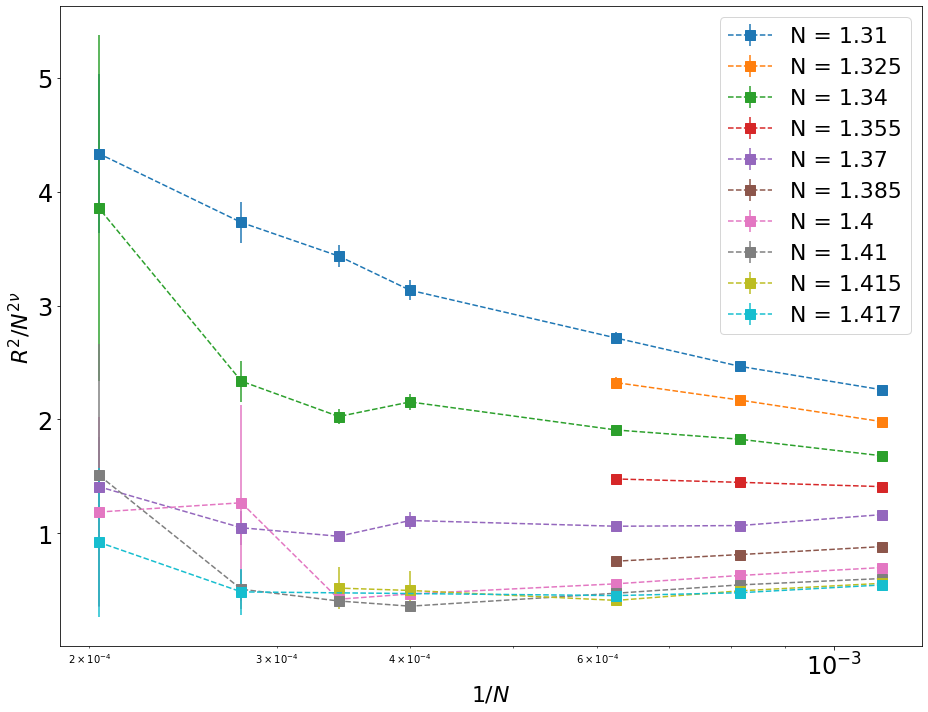

In [20]:
 
    
lengths = np.unique(data_np[:, 1])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)


#lengths
lengths = [1.27, 1.28, 1.29, 1.3, 1.31, 1.32]
lengths = [1.26, 1.27, 1.275, 1.285, 1.295, 1.305, 1.315, 1.325]
lengths = [1.31 , 1.325, 1.34 , 1.355, 1.37 , 1.385, 1.4  , 1.41 , 1.415,
       1.417]
for l in lengths:
    #if l<900: continue
    #if (l==4900 or l==36000 or l==25000): continue
    data_l = data_np[data_np[:,1]==l]
    
    ind = np.argsort(data_l[:,0])
    data_l=data_l[ind]
    J_l = data_l[:, 0]
    #print(J_l)
    r_l = data_l[:, 3]
    
    bc = r_l/np.power( data_l[:, 0], 2*nu)
 
    errs = data_l[:, 4]/np.power( data_l[:, 0], 2*nu)

    plt.errorbar(1/J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str((l)))
 
 
plt.xlabel(r'$1/N $', fontsize = 22)
plt.ylabel(r"$ R ^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
#plt.xlim(1.26, 1.45)
#plt.ylim(0.05, 0.60795)
 
#plt.xlim(left = 1.255, right=1.355)
plt.legend(fontsize=22)

plt.xscale("log")
#plt.grid()
plt.tight_layout()

#plt.axhline(0.32369525, c= "k")

#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")
plt.savefig("Thesis/Images/rscaling_longchainscross_deep.png", bbox_inches='tight')

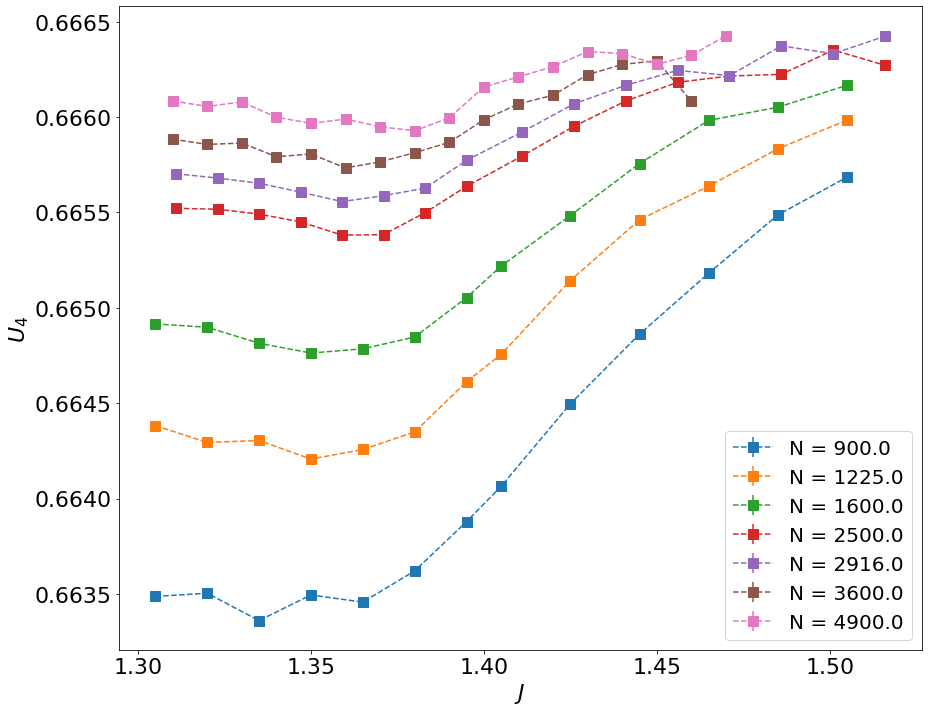

In [15]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if l<900: continue
    #if l==5000: continue
        
    #if l==1000: continue
        
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]    
    
    
    J_l = data_l[:, 1]
    
    #print(bc)
    #print(data_l[:,17])
    
    bc = 1 - data_l[:,11]/3/data_l[:,9]/data_l[:,9]
    #print(bc)
  
    errs = (2*data_l[:,10] / data_l[:,9])**2 + (data_l[:,12] /data_l[:,11])
    errs=0*np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(1/3 -0.8, 0.7)
#plt.xlim(1.2, 1.45)
 
#plt.xlim(left = 1.255, right=1.355)


plt.legend(loc="best", fontsize=20)
 
 
plt.tight_layout()

plt.savefig("Thesis/Images/bindercumulantsenergy_longchains.png", bbox_inches='tight')